Proyecto de Machine Learning para Henry

In [222]:
#importarmos librerias a utilizar
import os  # leer y escribir un archivo
from pathlib import Path  # manipular rutas
import pandas as pd  #manejo estructura de datos
import numpy as np
from numpy import NaN
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import geopandas as gpd
import matplotlib.pyplot as plt
import pygeos
import geopy
import missingno as msno #visualizacion valores nulos
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy as sp
from geopy.geocoders import Nominatim
from geopy import Location


In [223]:
# abrimos archivos con los que trabajaremos
dftest = pd.read_csv('properties_colombia/properties_colombia_test.csv', sep=',', encoding='utf-8') # carga de archivo
dftrain = pd.read_csv('properties_colombia/properties_colombia_train.csv', sep=',', encoding='utf-8') # carga de archivo


In [224]:
# revisamos informacion
print(dftest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65850 entries, 0 to 65849
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       65850 non-null  int64  
 1   id               65850 non-null  object 
 2   ad_type          65850 non-null  object 
 3   start_date       65850 non-null  object 
 4   end_date         65850 non-null  object 
 5   created_on       65850 non-null  object 
 6   lat              49433 non-null  float64
 7   lon              49433 non-null  float64
 8   l1               65850 non-null  object 
 9   l2               65850 non-null  object 
 10  l3               62193 non-null  object 
 11  l4               15074 non-null  object 
 12  l5               9052 non-null   object 
 13  l6               2364 non-null   object 
 14  rooms            9110 non-null   float64
 15  bedrooms         13403 non-null  float64
 16  bathrooms        52054 non-null  float64
 17  surface_tota

In [225]:
print(dftrain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       197549 non-null  int64  
 1   id               197549 non-null  object 
 2   ad_type          197549 non-null  object 
 3   start_date       197549 non-null  object 
 4   end_date         197549 non-null  object 
 5   created_on       197549 non-null  object 
 6   lat              148051 non-null  float64
 7   lon              148051 non-null  float64
 8   l1               197549 non-null  object 
 9   l2               197549 non-null  object 
 10  l3               186517 non-null  object 
 11  l4               45367 non-null   object 
 12  l5               27409 non-null   object 
 13  l6               6867 non-null    object 
 14  rooms            27537 non-null   float64
 15  bedrooms         40525 non-null   float64
 16  bathrooms        156467 non-null  floa

In [212]:
# sacamos el promedio del precio y agregamos la columna Target con la condición requerida, si es mayor cara (1) si es menor barata (0)
mean = dftrain['price'].mean()


dftrain['Target'] = np.where(dftrain['price']>= mean, '1', '0')

dftrain

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry,Target
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203),1
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485),0
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709),0
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY,1
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,444298,u2M1W+AwbEZlRdmphDOuZg==,Propiedad,2020-10-27,9999-12-31,2020-10-27,4.649682,-74.161950,Colombia,Cundinamarca,...,NaN,1.290000e+08,COP,NaN,LM: VENDO APARTAMENTO EN TORRES DE TINTALA,"VENDO LINDO APARTAMENTO EN EL TINTAL, SEXTO PI...",Apartamento,Venta,POINT (-74.1619504 4.649682),0
197545,976934,m0P17AlA6Sp+uvJTI3x3AA==,Propiedad,2020-11-27,2020-12-09,2020-11-27,4.668000,-74.055000,Colombia,Cundinamarca,...,17.0,1.350000e+08,COP,NaN,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668),0
197546,508286,nSRnmPZIwE92m/FQv8ktVQ==,Propiedad,2020-10-28,2021-01-02,2020-10-28,3.413000,-76.541000,Colombia,Valle del Cauca,...,NaN,5.200000e+08,COP,NaN,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413),0
197547,546633,cbYIZxxFHsXvvkixg5+DBQ==,Propiedad,2020-08-14,2020-08-14,2020-08-14,4.674874,-74.147077,Colombia,Cundinamarca,...,NaN,2.900000e+08,COP,Mensual,VENTA CASALOTE FONTIBON,CASALOTE BIEN UBICADO FONTIBON OPSION DE CONST...,Casa,Venta,POINT (-74.14707691 4.67487431),0


In [226]:
#graficamos valores de la columna Target
sns.displot(dftrain['Target'])
plt.show

KeyError: 'Target'

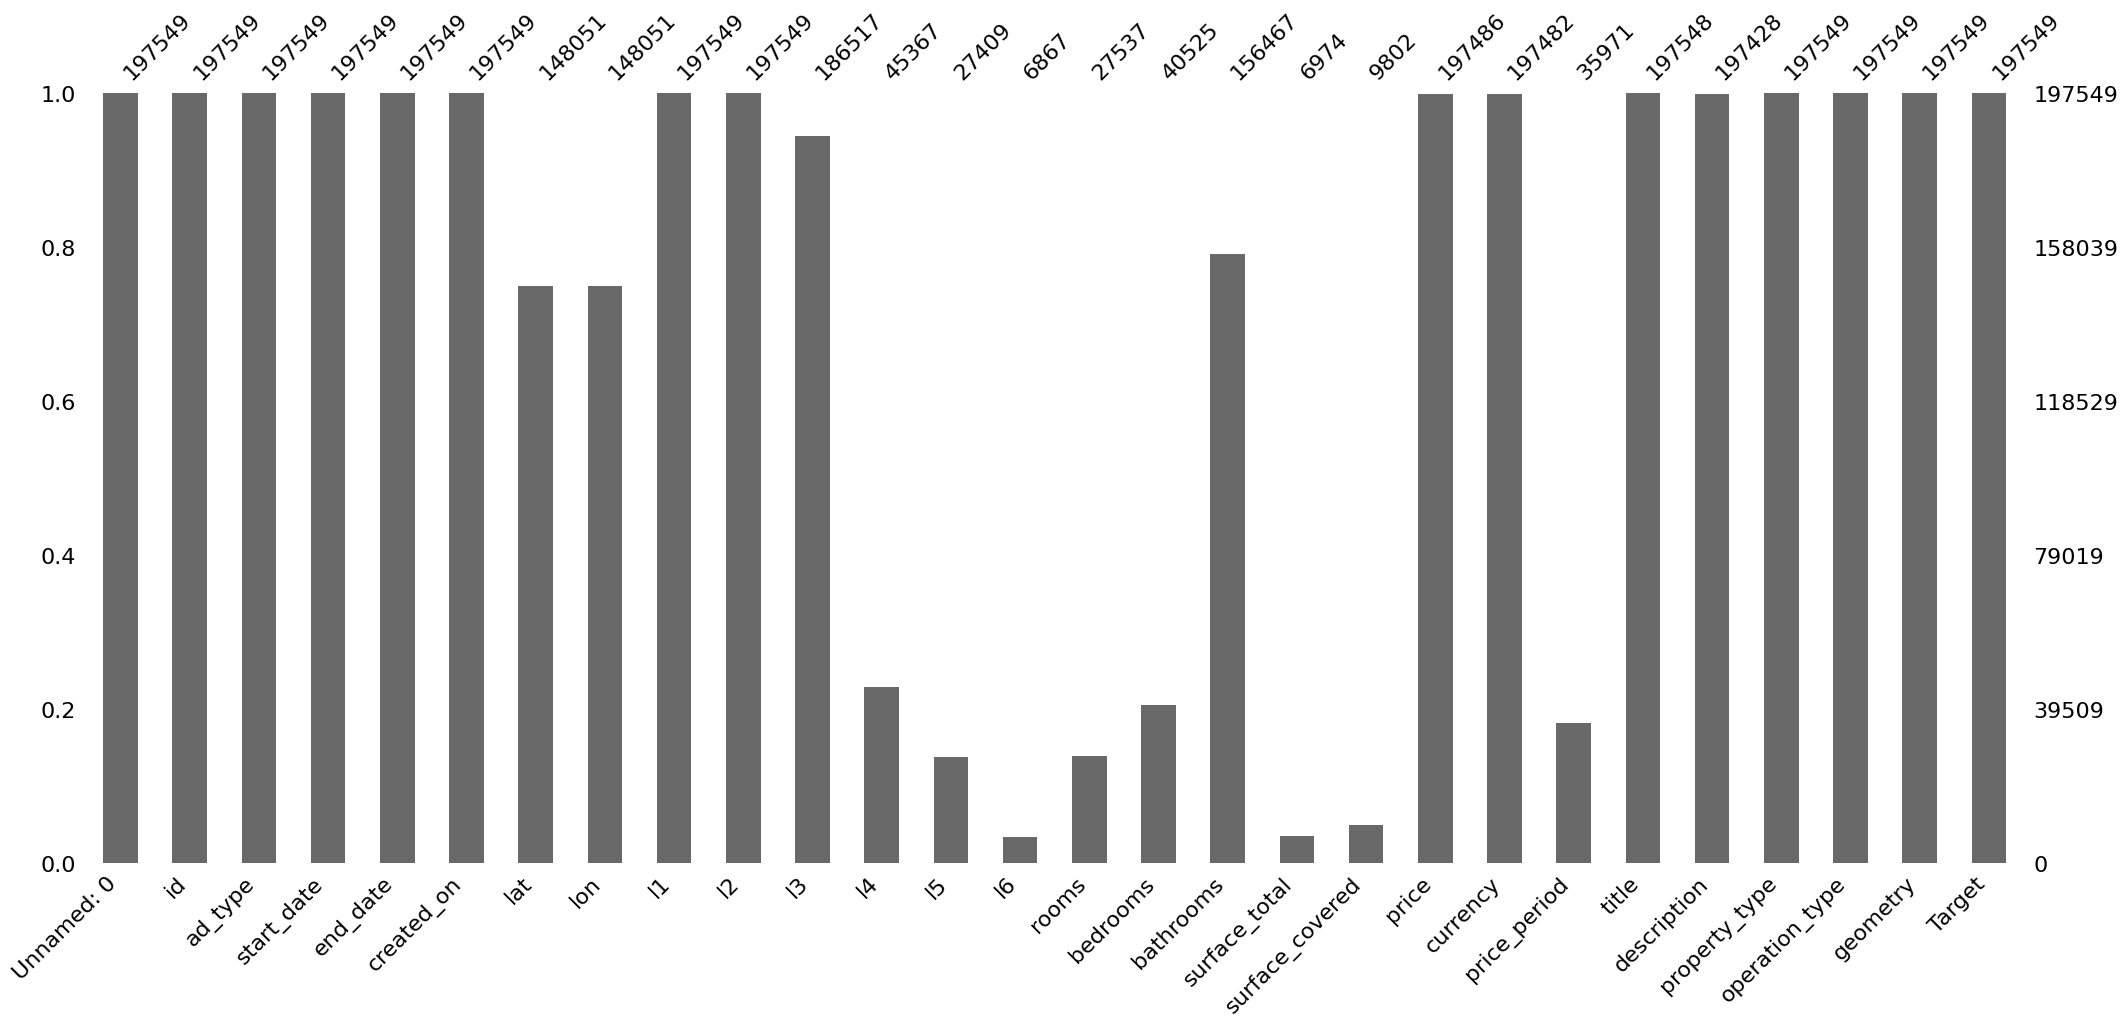

In [214]:
# graficamos para visualizar porcentaje valores nulos
msno.bar(dftrain)
plt.show()

In [219]:
# reemplazamos valores nulos de latitud y longitud, a traves de un proceso largo se pudiese sacar los valores de la ubicación mas
# cercana o realizarlo con la moda, en este caso nos decidimos por el promedio

dftrain['lat'] = dftrain['lat'].replace(NaN, dftrain['lat'].mean())
dftrain['lon'] = dftrain['lon'].replace(NaN, dftrain['lon'].mean())



c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


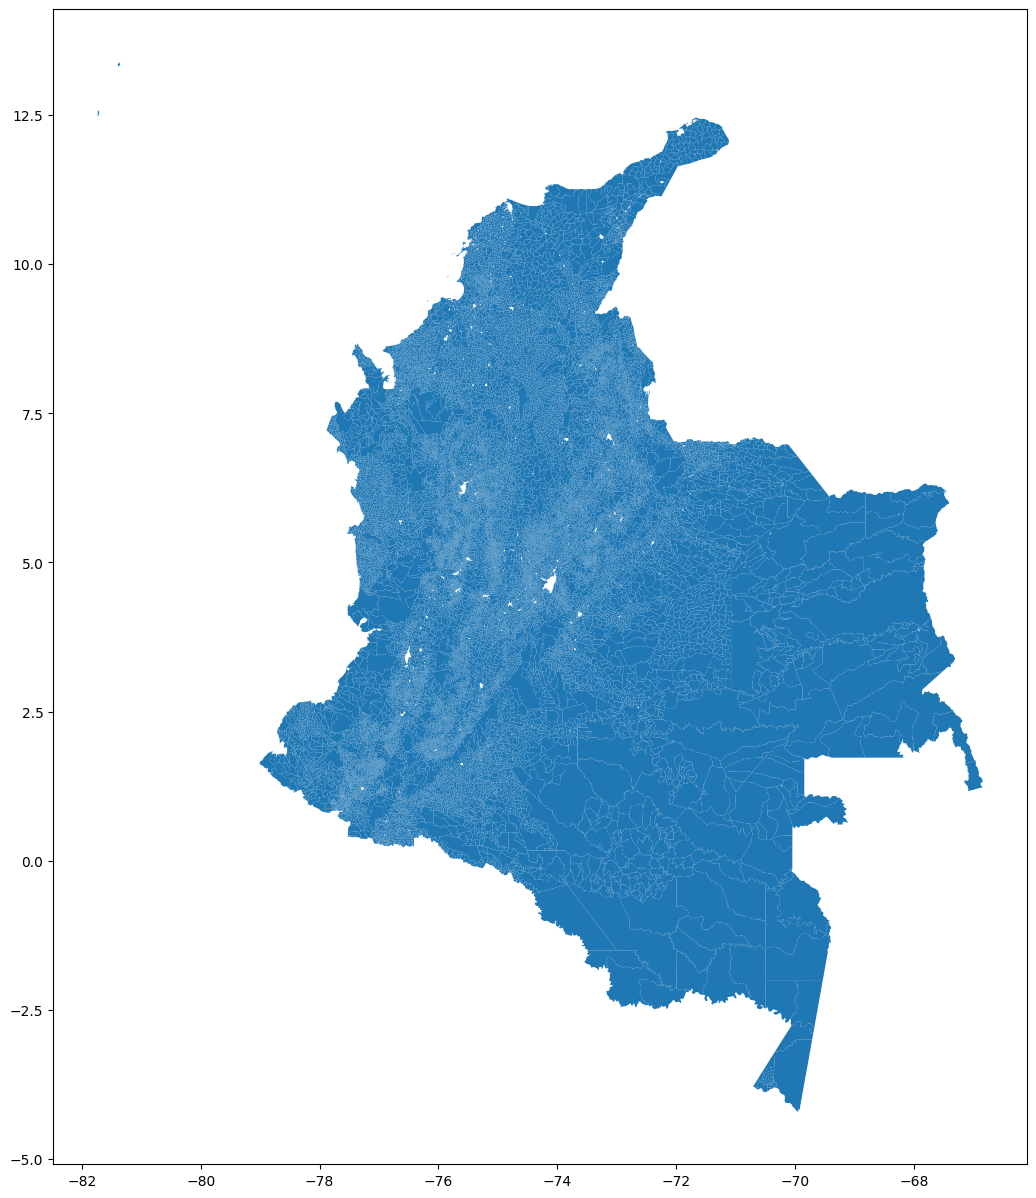

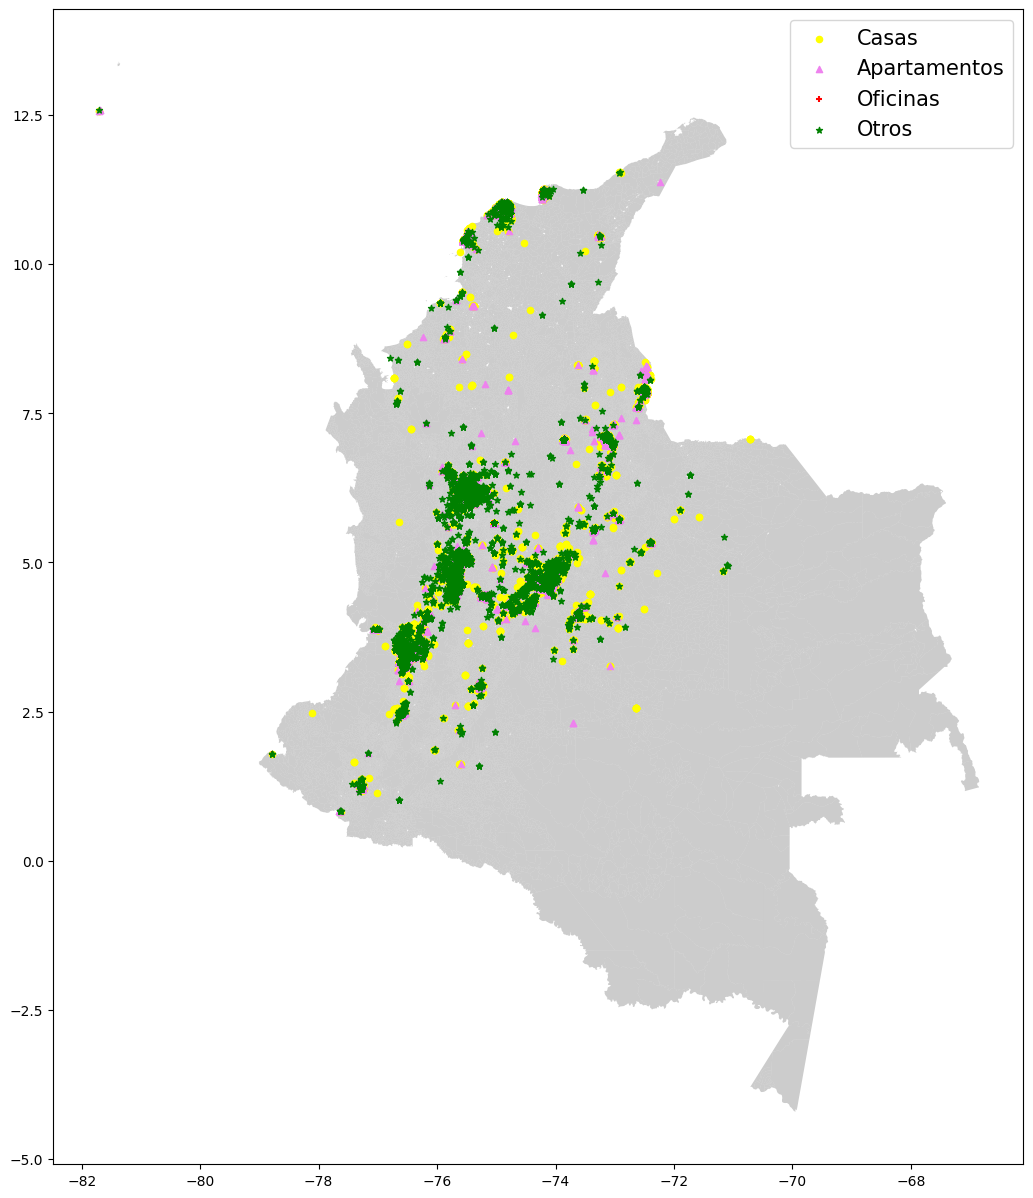

In [221]:
# como se sugiere en el proyecto validamos que todas las coordenadas estan en Colombia, aunque la mayoria de valores
# estan en Colombia se pueden notar pocos que se encuentran fuera por lo que limitamos la busqueda con un query provisional
crs ={"init": "epsg:4326"}
dftrainp = dftrain.query('-90 < lon < -70')
dftrainp = dftrain.query('-10 < lat < 20')
mapacolombia = gpd.read_file("ShapeFile\CRVeredas_2020.shp")
fig,ax = plt.subplots(figsize= (15,15))
mapacolombia.plot (ax = ax)
geometry = gpd.points_from_xy(dftrainp["lon"], dftrainp["lat"])
gdf = gpd.GeoDataFrame(dftrainp, crs=crs, geometry=geometry)
fig,ax = plt.subplots(figsize= (15,15))
mapacolombia.plot(ax = ax, alpha = 0.4, color="grey")
gdf[gdf["property_type"]=="Casa"].plot(ax=ax, markersize=20, color="yellow", marker="o", label = "Casas")
gdf[gdf["property_type"]=="Apartamento"].plot(ax=ax, markersize=20, color="violet", marker="^", label = "Apartamentos")
gdf[gdf["property_type"]=="Oficina"].plot(ax=ax, markersize=20, color="red", marker="+", label = "Oficinas")
gdf[gdf["property_type"]=="Otro"].plot(ax=ax, markersize=20, color="Green", marker="*", label = "Otros")
plt.legend(prop={"size":15})



In [178]:
# eliminamos columnas que no son necesarias o tienen demasiados valores nulos

dftrain = dftrain.drop([        
        "Unnamed: 0", "id", "ad_type", "start_date", "end_date","l1", "l2", "l3", "l4","l5","l6","surface_total","surface_covered",
        "price_period","operation_type","title","description","currency","created_on","price", "rooms","bedrooms",
    ],
    axis=1,
)

In [179]:
# realizamos el mismo proceso con Bathrooms pero con la mediana
dftrain["bathrooms"].fillna(dftrain["bathrooms"].notna().median(), inplace=True)

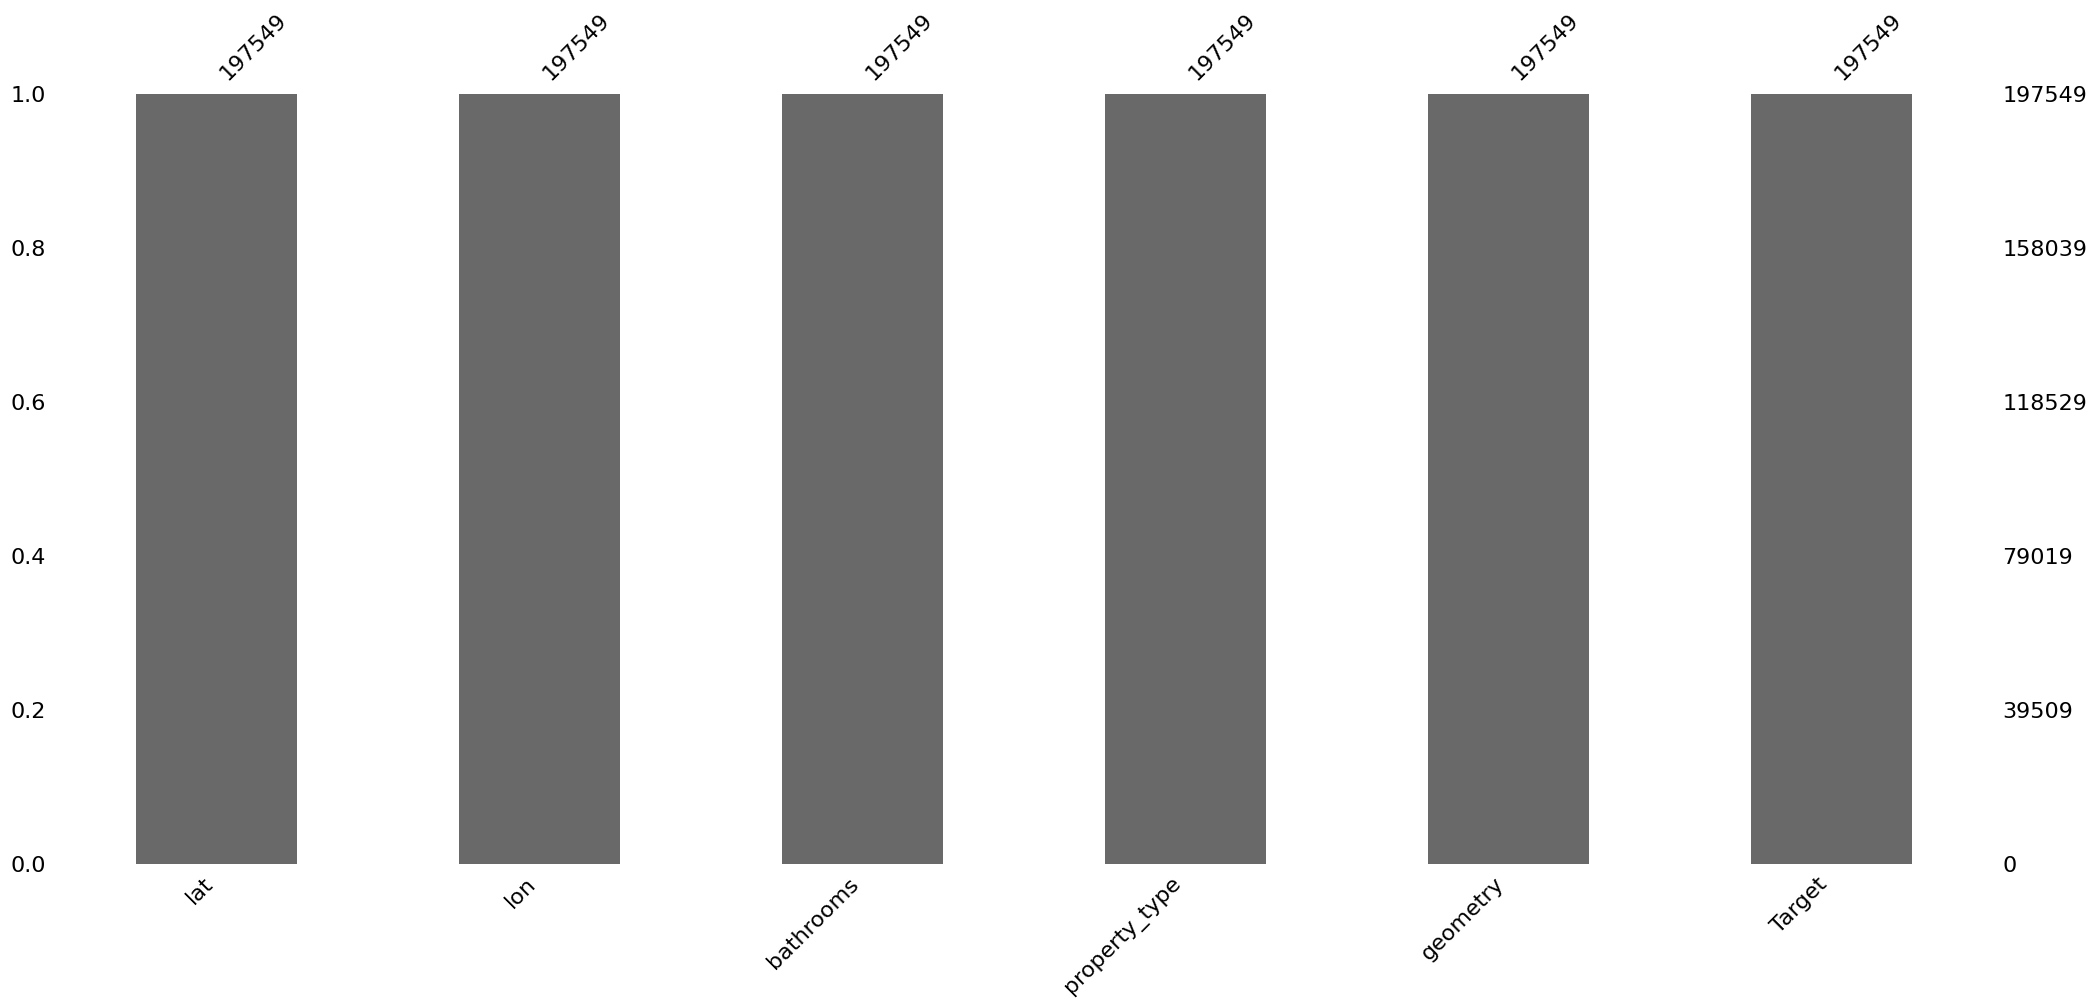

In [180]:
# volvemos a graficar
msno.bar(dftrain)
plt.show()

In [181]:
# revisamos como queda el dataframe
dftrain

,lat,lon,bathrooms,property_type,geometry,Target
0,6.203000,-75.572000,4.0,Casa,POINT (-75.572 6.203),1
1,4.722748,-74.073115,2.0,Apartamento,POINT (-74.0731146 4.7227485),0
2,4.709000,-74.030000,2.0,Casa,POINT (-74.03 4.709),0
3,5.666001,-75.041045,1.0,Otro,POINT EMPTY,1
4,5.666001,-75.041045,2.0,Apartamento,POINT EMPTY,0
...,...,...,...,...,...,...
197544,4.649682,-74.161950,1.0,Apartamento,POINT (-74.1619504 4.649682),0
197545,4.668000,-74.055000,1.0,Oficina,POINT (-74.055 4.668),0
197546,3.413000,-76.541000,1.0,Otro,POINT (-76.541 3.413),0
197547,4.674874,-74.147077,2.0,Casa,POINT (-74.14707691 4.67487431),0


In [182]:
#aplicamos label encoder para convertir a valores numericos
labenc = preprocessing.LabelEncoder() 
dftrain['property_type'] = labenc.fit_transform(dftrain['property_type'])

In [183]:
# Definimos qué valores se utilizarán para predecir, también cuál es el objetivo a predecir
X = dftrain[['lat', 'lon', "bathrooms", "property_type"]]                                                   
y = dftrain.Target 

In [184]:
# Se definen parametros como el número de vecinos, se prueban varios valores y el que mejor se adapta en  
# precision es el 9 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [185]:
# se crea un clasificador
clasificador = KNeighborsClassifier()

In [186]:
#ajustamos valores
clasificador.fit(X.values,y.values)

KNeighborsClassifier()

In [187]:
# entrenamos
ypred = clasificador.predict(X.values)

In [188]:
# imprimimos resultados
print("recall:", recall_score(y, ypred, average='macro'))
print("accuracy:", accuracy_score(y,ypred))
print("precision:", precision_score(y,ypred, average='macro'))


recall: 0.8692805866177145
accuracy: 0.9059929435228729
precision: 0.8690764071422343


In [ ]:
# realizamos el mismo proceso con el dataframe Test para poder aplicar el algoritmo

In [189]:
# reemplazamos valores nulos por media
dftest['lat'] = dftest['lat'].replace(NaN, dftest['lat'].mean())
dftest['lon'] = dftest['lon'].replace(NaN, dftest['lon'].mean())

In [190]:
# eliminamos columnas que no son necesarias o tienen demasiados valores nulos

dftest = dftest.drop([        
        "Unnamed: 0", "id", "ad_type", "start_date", "end_date","l1", "l2", "l3", "l4","l5","l6","surface_total","surface_covered",
        "price_period","operation_type","title","description","currency","created_on","rooms","bedrooms",
    ],
    axis=1,
)

In [191]:
dftest.head()

,lat,lon,bathrooms,property_type,geometry
0,4.722000,-74.075000,3.0,Casa,POINT (-74.075 4.722)
1,5.686868,-75.042164,3.0,Apartamento,POINT EMPTY
2,6.259253,-75.628381,1.0,Casa,POINT (-75.6283806 6.25925267)
3,6.203000,-75.556000,NaN,Lote,POINT (-75.556 6.203)
4,5.686868,-75.042164,2.0,Casa,POINT EMPTY


In [192]:
dftest["bathrooms"].fillna(dftest["bathrooms"].notna().median(), inplace=True)

In [193]:
#codificamos 
labenc = preprocessing.LabelEncoder() 
dftest['property_type'] = labenc.fit_transform(dftest['property_type'])

In [194]:
# aplicamos algoritmos
X = dftest[['lat', 'lon', "bathrooms", "property_type"]]
ypred = clasificador.predict(X.values)

In [195]:
results = pd.DataFrame({'pred': ypred})

In [196]:
# creamos archivo requerido si index
results.to_csv("Cgil4.csv", index=False)

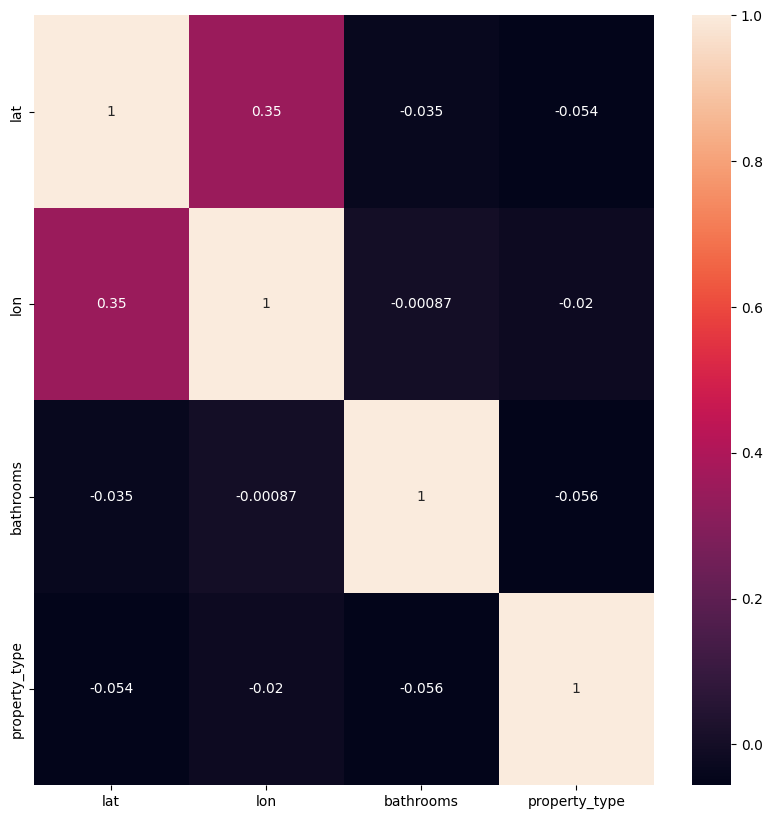

In [197]:
#correlación de columnas 
corr = dftrain.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True)
plt.show()

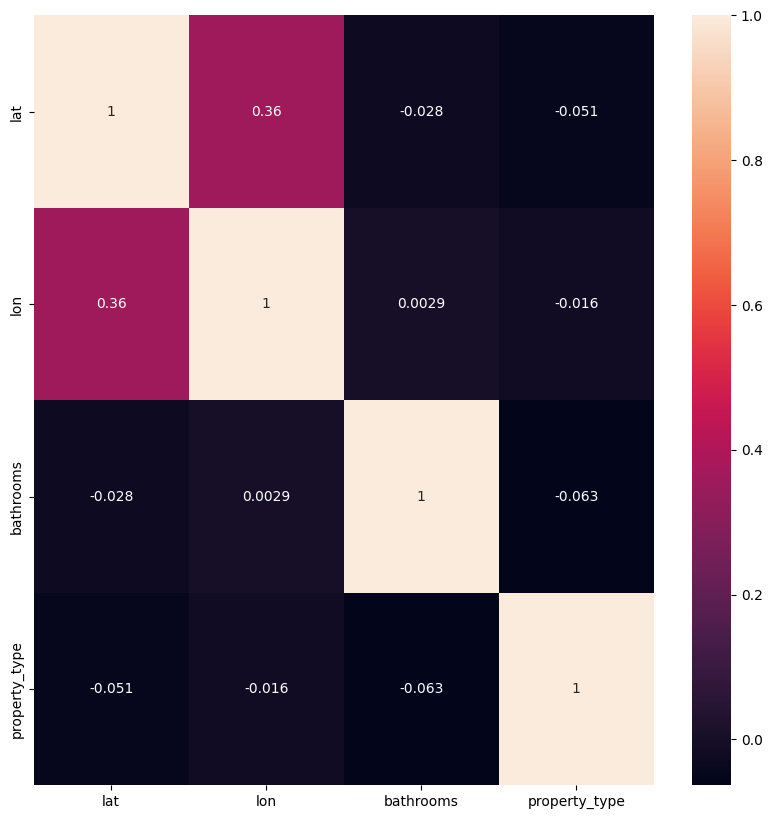

In [198]:
corr = dftest.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True)
plt.show()